In [1]:
import pickle as pkl
import pandas as pd
import nibabel as nib
import nilearn
from nilearn import plotting
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt


In [2]:
import torch
import matplotlib.pyplot as plt

/data/users2/vitkyal/softwares/miniconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


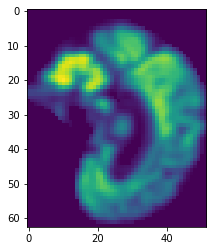

In [3]:
file_path = '/data/users2/vitkyal/projects/SMLvsDL/reprex/salfunction_1.pt'
f = torch.load(file_path).detach().cpu().numpy()
plt.imshow(f[0, 0, 26, :, :])
#f_numpy = f.cpu().numpy()

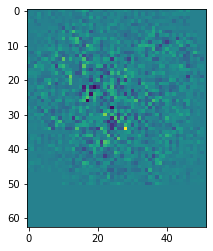

In [4]:
file_path = '/data/users2/vitkyal/projects/SMLvsDL/reprex/salfunction_4.pt'
f = torch.load(file_path)#.detach().cpu().numpy()
plt.imshow(f[0, 0, 26, :, :])
#f_numpy = f.cpu().numpy()

In [5]:
abs_img_data.shape

(3654, 52, 53)

(58, 1, 64, 64, 64)


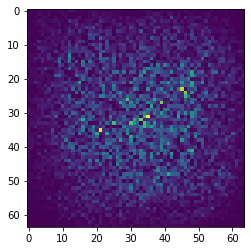

In [3]:
value = nib.load('/data/users2/vitkyal/projects/SMLvsDL/reprex/saliency_analysis/average_smrimask.nii')

for i in range(1,2): #1e-05 #_mostofall/max
    #path_file_name = '/data/users2/vitkyal/projects/SMLvsDL/results/s1AlexNet3D_Dropout_scorename_ResearchGroup_iter_' + str(i) + '_tss_350_rep_' + str(i) + '_bs_32_lr_0.0001_espat_20/test_sal.pkl'
    path_file_name = '/data/users2/vitkyal/projects/SMLvsDL/results/s1AlexNet3D_Dropout_scorename_ResearchGroup_iter_1_tss_350_rep_1_bs_32_lr_0.0001_espat_20/test_sal.pkl'
    with open(path_file_name,'rb') as f:
        isal = pkl.load(f) #isal shape : (32, 1, 53, 63, 52)
        abs_img_data = isal#abs(isal)
        print(abs_img_data.shape)
        #smoothed_abs_img_data = gaussian_filter(abs_img_data, sigma=1.3) #0.7 sigma for abs #1.2 without abs
        #max_values = np.max(smoothed_abs_img_data, axis=(2, 3, 4), keepdims=True)
        #normalized_images = smoothed_abs_img_data / max_values
        #imp later
        #avg = np.mean(abs_img_data, axis=0) #try t-test and fdr correction
        #print(avg.shape)
        #uncomment later
        #save_file_name = 'image' + str(i) + '_s3.nii' 
        #nib.save(nib.Nifti1Image(avg[0], affine=value.affine, header= value.header), save_file_name)
plt.imshow(abs_img_data[0, 0, 26, :, :])

In [6]:
#Verifying if there are no zeros in the last column
#print (abs_img_data[0, 0, 26, :, -1:])

In [33]:
randimg = abs_img_data[5][0]
nib.save(nib.Nifti1Image(randimg, affine=value.affine, header= value.header), 'randimg5.nii')

In [10]:
# Load the 9 NIfTI images
img0 = nib.load('image0_s3.nii')
img1 = nib.load('image1_s3.nii')
img2 = nib.load('image2_s3.nii')
img3 = nib.load('image3_s3.nii')
img4 = nib.load('image4_s3.nii')
img5 = nib.load('image5_s3.nii')
img6 = nib.load('image6_s3.nii')
img7 = nib.load('image7_s3.nii')
img8 = nib.load('image8_s3.nii')
img9 = nib.load('image9_s3.nii')

# Check that the dimensions of the images are the same
assert img1.shape == img2.shape == img3.shape == img4.shape == img5.shape == img6.shape == img7.shape == img8.shape == img9.shape

# Create an empty image with the same dimensions as the input images
empty_img = nib.Nifti1Image(np.zeros(img1.shape), img1.affine)

# Loop over each voxel and calculate the average value
for i in range(empty_img.shape[0]):
    for j in range(empty_img.shape[1]):
        for k in range(empty_img.shape[2]):
            voxel_values = []
            voxel_values.append(img0.get_fdata()[i, j, k])
            voxel_values.append(img1.get_fdata()[i, j, k])
            voxel_values.append(img2.get_fdata()[i, j, k])
            voxel_values.append(img3.get_fdata()[i, j, k])
            voxel_values.append(img4.get_fdata()[i, j, k])
            voxel_values.append(img5.get_fdata()[i, j, k])
            voxel_values.append(img6.get_fdata()[i, j, k])
            voxel_values.append(img7.get_fdata()[i, j, k])
            voxel_values.append(img8.get_fdata()[i, j, k])
            voxel_values.append(img9.get_fdata()[i, j, k])
            avg_value = np.mean(voxel_values)
            empty_img.get_fdata()[i, j, k] = avg_value

# Save the resulting image as a new NIfTI file
nib.save(empty_img, 'average_image_s1.nii')


In [33]:
#nib.save(nib.Nifti1Image(isal[0,0], affine=value.affine, header= value.header), 'image0_a3.nii')

In [49]:
#vari = nib.load('average_image_s3.nii')
#img = vari.get_fdata()

#abs_img_data = abs(img)
#smoothed_abs_img_data = gaussian_filter(abs_img_data, sigma=0.8)
#smoothed_abs_img = nib.Nifti1Image(smoothed_abs_img_data, vari.affine)
#nib.save(smoothed_abs_img, 'smoothed_abs_image.nii')

In [3]:
new_img.shape

(1, 1, 53, 63, 52)

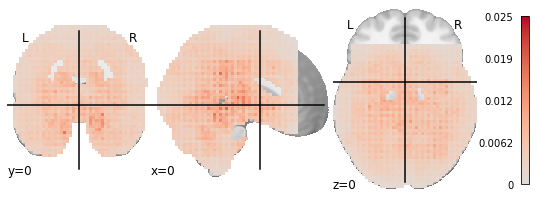

In [11]:
new_img = nib.load('average_image_s1.nii')
x, y, z = 0, 0, 0 # Example coordinates
display = plotting.plot_stat_map(new_img, cut_coords=(x, y, z), display_mode='ortho', cmap= 'coolwarm')#, threshold=0.6) #1.7 for abs
plt.show()

#plotting.plot_stat_map(new_img,threshold=2.1)

In [1]:
#voxel to voxel do a two sample t-test followed by fdr correction between structural and functional for all voxels
#t-test library -- plot the difference between the two -sign(t-value)*logP

In [49]:
vari = nib.load('average_image_d3.nii')
img = vari.get_fdata()
img.min(), img.max()

(-1.983529743552208, 1.8689023494720458)

In [5]:
masks_array.shape

(466, 53, 63, 52)

In [3]:
#Create a mask

relative_path_lowres_sMRI = '/data/users2/ibatta/data/features/lowresSMRI/ADNI/nii/'
sMRI_file_name = 'smwc1T1.nii.gz'
#df = readFrames(cfg.ssd, mode, cfg.tss, cfg.rep)
file_path = '/data/users2/vitkyal/projects/SMLvsDL/bincomplex.csv'
df = pd.read_csv(file_path, delimiter = ',')
idx = 0


In [4]:
imgs = []
for idx in range(0,466):
    fNs = relative_path_lowres_sMRI + df['lowres_smriPath'].iloc[idx] + sMRI_file_name
    s = nib.load(fNs).get_fdata()
    imgs.append(s)
masks_array = np.array(imgs)
#masks_array = np.mean(masks_array,0)
#masks_array[masks_array>.03] =1
#masks_array[masks_array<=.03]=0

In [12]:
np.sum(masks_array)
print(masks_array.shape)
print(fNs)
fl = nib.load(fNs)
hdr = fl.header
aff = fl.affine
print(hdr)
print(aff)

(53, 63, 52)
/data/users2/ibatta/data/features/lowresSMRI/ADNI/nii/003_S_6256/Accelerated_Sagittal_MPRAGE/2018-03-13_15_53_35.0/S666705/anat/smwc1T1.nii.gz
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 53 63 52  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.2:a4f562d9'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b  

In [15]:
average_mask_nifti = nib.Nifti1Image(masks_array, affine=aff, header=hdr)

output_path = "average_smrimask.nii"

# Save the average mask as a .nii file
nib.save(average_mask_nifti, output_path)

print("Average mask saved as", output_path)

Average mask saved as average_smrimask.nii


In [8]:
#Checking if there is any NaN or zeros in the code

import numpy as np
import nibabel as nib

#masks
#nan_mask = np.isnan(masks_array).any(axis=0)
nan_mask = (masks_array == 0).any(axis=0) #to test for zeros

nan_image = np.zeros(nan_mask.shape, dtype=np.uint8)
nan_image[nan_mask] = 255  
nan_nifti = nib.Nifti1Image(nan_image, affine=None)

nib.save(nan_nifti, 'nan_image.nii')

In [15]:
#Implement Captum Saliency function

from captum.attr import IntegratedGradients
from captum.attr import Saliency
from captum.attr import DeepLift
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz

In [ ]:
viz.visualize_image_attr(grads, original_image, method="blended_heat_map", sign="absolute_value",
                          show_colorbar=True, title="Overlayed Gradient Magnitudes")

In [ ]:
saliency = Saliency(net)
grads = saliency.attribute(input, target=labels[ind].item())
grads = np.transpose(grads.squeeze().cpu().detach().numpy(), (1, 2, 0))

In [14]:
import torch.nn.functional as F

def addPadding(input_tensor):
    desired_size = (64,64,64)
    current_size = input_tensor.shape[2:]  
    padding = []
    for i in range(len(current_size)):
        diff = desired_size[i] - current_size[i]
        pad_before = diff // 2
        pad_after = diff - pad_before
        padding.extend([pad_before, pad_after])
    
    total_padding = sum(padding)
    diff = sum(desired_size) - sum(current_size)
    if diff != total_padding:
        padding[-1] = padding[-1] - (total_padding - diff)
    
    padded_size = input_tensor.shape[:2] + tuple(desired_size)
    padded_image = F.pad(input_tensor, padding)
    print(padded_image.shape)
    return padded_image
input_tensor = torch.randn(58,1,53,63,52)
padded_img = addPadding(input_tensor)

torch.Size([58, 1, 65, 64, 63])


In [19]:
#Adding padding to the mask
mask_path = '/data/users2/vitkyal/projects/SMLvsDL/reprex/saliency_analysis/average_smrimask.nii'#loadMasks(cfg, md)
mask = nib.load(mask_path)
masks = mask.get_fdata()
input_tensor = torch.from_numpy(masks).unsqueeze(0).unsqueeze(0)
new_mask = addPadding(input_tensor)
padded_data = new_mask.squeeze().detach().numpy()
padded_nii = nib.Nifti1Image(padded_data, affine=mask.affine)
output_path = '/data/users2/vitkyal/projects/SMLvsDL/reprex/saliency_analysis/average_smrimask64.nii'
nib.save(padded_nii, output_path)

In [15]:
type(masks)

numpy.memmap

In [15]:
#Code to check number of subjects in each research-group/category
path_file = '/data/users2/vitkyal/projects/SMLvsDL/mainbinaryfile.csv'
import pandas as pd

df = pd.read_csv(path_file)

count = df[df['ResearchGroup'] == 'Dementia'].shape[0]

print("Number of subjects with 'CN':", count)


Number of subjects with 'CN': 91
